In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-analysis/salesforcourse-4fe2kehu.csv


> ****#Importing libaris

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import plotly.express as px 
import os
from datetime import datetime


#Import Dataset

In [3]:
df= pd.read_csv("/kaggle/input/sales-analysis/salesforcourse-4fe2kehu.csv")
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [5]:
df.shape

(34867, 16)

> #Data Preprocessing

In [6]:
df=df.drop("index", axis= 1)

In [7]:
df=df.drop("Column1", axis= 1)


In [8]:
df=df.drop("Date", axis= 1)


In [9]:
#Drop-Duplicated
df.duplicated().sum()

5

In [10]:
df=df.drop_duplicates()

In [11]:
# Drop Missing Value
df.isnull().sum()

Year                1
Month               1
Customer Age        1
Customer Gender     1
Country             1
State               1
Product Category    1
Sub Category        1
Quantity            1
Unit Cost           1
Unit Price          1
Cost                1
Revenue             0
dtype: int64

In [12]:
df=df.dropna()

In [13]:
df["Customer Age"]=df["Customer Age"].astype(int)

In [14]:
df["Quantity"]=df["Quantity"].astype(int)

In [15]:
df["Unit Cost"]=df["Unit Cost"].astype(int)

In [16]:
df["Cost"]=df["Cost"].astype(int)

In [17]:
df["Revenue"]=df["Revenue"].astype(int)

In [18]:
df["Unit Price"]=df["Unit Price"].round(2)

In [19]:
df["Year"]=df["Year"].astype(int)

In [20]:
df.head()

,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,80,109.00,80,109
1,2016,February,29,F,United States,Washington,Clothing,Gloves,2,24,28.50,49,57
2,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,3,5.00,11,15
3,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,87,116.50,175,233
4,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,35,41.67,105,125


In [21]:
df["Profit"]= df["Revenue"] - df["Cost"]

In [22]:
df.describe().round(2)

,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
count,34861.00,34861.00,34861.00,34861.00,34861.00,34861.00,34861.00,34861.00
mean,2015.57,36.38,2.00,349.78,389.29,576.08,640.96,64.87
std,0.50,11.11,0.81,490.07,525.34,690.52,736.67,152.89
min,2015.00,17.00,1.00,0.00,0.67,2.00,2.00,-937.00
25%,2015.00,28.00,1.00,45.00,53.67,85.00,102.00,5.00
50%,2016.00,35.00,2.00,150.00,179.00,261.00,319.00,27.00
75%,2016.00,44.00,3.00,455.00,521.00,769.00,902.00,96.00
max,2016.00,87.00,3.00,3240.00,5082.00,3600.00,5082.00,1842.00


In [23]:
bins = [17, 25, 35, 55, float('inf')]
labels = ['17-25', '26-35', '36-55', 'Above 55']

In [24]:
df['age_group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)

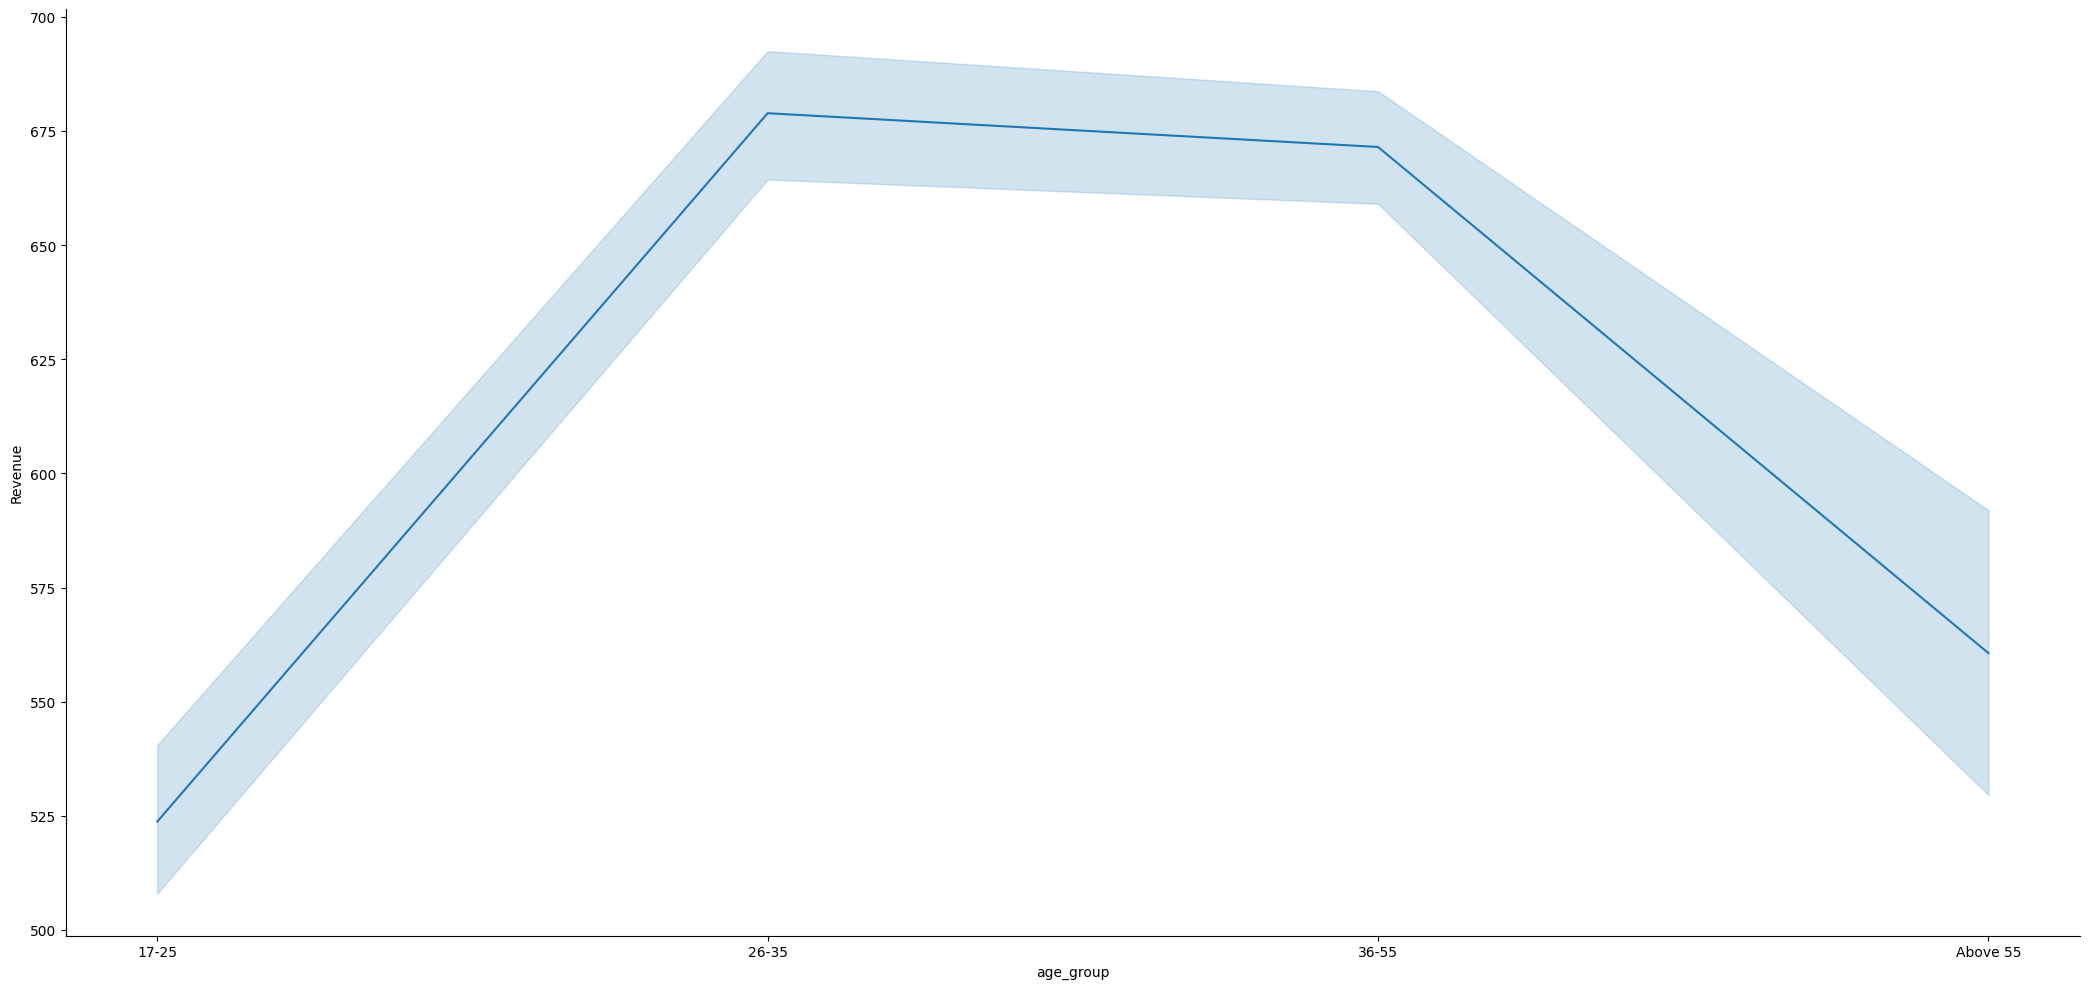

In [25]:
sns.relplot(data=df, x="age_group" ,y="Revenue", kind="line", height =10, aspect = 2.1)
plt.show()

In [26]:
Product_f=df.groupby(["Product Category"])["Quantity"].sum().reset_index()
Product_f

,Product Category,Quantity
0,Accessories,45035
1,Bikes,14291
2,Clothing,10481


In [27]:
fig= px.bar(Product_f, x="Product Category",y="Quantity")
fig.show()

In [28]:
Product_S=df.groupby(["Sub Category"])["Quantity"].sum().reset_index()

In [29]:
fig=px.bar(Product_S,x="Sub Category",y="Quantity")
fig.show()

In [30]:
m_f= df.groupby(["Customer Gender"])[["Cost","Profit","Revenue"]].sum().reset_index()
m_f

,Customer Gender,Cost,Profit,Revenue
0,F,9834254,1098339,10932593
1,M,10248606,1163233,11411839


In [31]:
fig=px.bar(m_f,x="Customer Gender",y="Profit")
fig.show()

In [32]:
age_R=df.groupby(["Customer Age"])[["Profit","Revenue","Cost"]].sum().reset_index()
age_R.head()


,Customer Age,Profit,Revenue,Cost
0,17,16543,146427,129884
1,18,29827,227290,197463
2,19,30412,291759,261347
3,20,32180,247344,215164
4,21,40359,297809,257450


In [33]:
fig=px.line(age_R,x="Customer Age",y=["Profit","Revenue","Cost"])
fig.show()

In [34]:
c_f= df.groupby(["Country"])[["Cost","Profit","Revenue"]].sum().reset_index()
c_f

,Country,Cost,Profit,Revenue
0,France,3173447,272657,3446104
1,Germany,3285665,958817,4244482
2,United Kingdom,3947265,328955,4276220
3,United States,9676483,701143,10377626


In [35]:
fig=px.bar(c_f, x="Country",y=["Cost","Profit","Revenue"])
fig.show()